**DMV Practical No.-4**
                                         
                                        

Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate
market. It includes various attributes such as property characteristics, location, sale prices,
and other relevant features. The goal is to perform data wrangling to gain insights into the
factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces,
special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available
(e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period,
property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or
label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average
sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
df.shape

(414, 8)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(414, 8)

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')
print("Cleaned Columns:", df.columns.tolist())#Prints the new column names as a Python list, so you can easily see the result.
#df.columns prints all column names of the dataset
#.str.replace(' ', '_')
#Replaces spaces (" ") in column names with underscores ("_").
#Example → "X1 transaction date" → "X1_transaction_date"

#.str.replace('-', '_') Replaces spaces ("-") in column names with underscores ("_").
#.str.replace('/', '_') Replaces spaces ("/") in column names with underscores ("_").

Cleaned Columns: ['No', 'X1_transaction_date', 'X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude', 'Y_house_price_of_unit_area']


In [9]:
df

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [10]:
# Filter by time period (e.g., 2012–2015)
df_filtered = df[(df['X1_transaction_date'] >= 2012) & (df['X1_transaction_date'] <= 2015)]
#Keeps only the rows where the transaction date is between 2012 and 2015.
# Filter by property age (e.g., houses older than 20 years)
df_old = df[df['X2_house_age'] > 20]

# Filter by number of convenience stores (e.g., more than 5)
df_many_stores = df[df['X4_number_of_convenience_stores'] > 5]
#Selects properties located in areas that have more than 5 nearby convenience stores.
#This can help analyze whether more stores nearby increase property price.

# Filter by location (e.g., latitude > 24.97)
df_location = df[df['X5_latitude'] > 24.97]
#Keeps only properties located north of a certain latitude (24.97).
#Used for studying how geographical location affects price.

# Show result
print("Filtered data shape:", df_filtered.shape)
df_filtered.head()
#We did all this because it was asked in Problem Statement Point 4 read it the problem statement is given at starting of the program

Filtered data shape: (414, 8)


,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
print(df.select_dtypes(include='object').columns)#checking whether any categorcial columns exist in our dataset

#This was done because see Problem Statement Point No-5 it is asked to handle categorical columns but we dont have 
#any categorical columns as Index in the output is empty

Index([], dtype='object')


In [12]:
# Average sale price by house age
df.groupby('X2_house_age')['Y_house_price_of_unit_area'].mean()

# Average sale price by number of convenience stores
df.groupby('X4_number_of_convenience_stores')['Y_house_price_of_unit_area'].mean()

X4_number_of_convenience_stores
0     26.462687
1     31.839130
2     31.412500
3     29.536957
4     37.474194
5     44.729851
6     46.951351
7     43.848387
8     44.696667
9     51.732000
10    48.430000
Name: Y_house_price_of_unit_area, dtype: float64

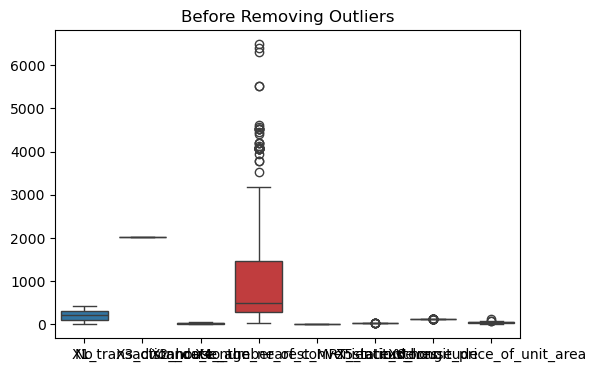

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")
plt.show()

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)#it calculates Q1 for that particular column
    Q3 = df[col].quantile(0.75)#it calculates Q3 for that particular column
    IQR = Q3 - Q1#It calculates the Inter Quartile Range(IQR)=Q3-Q1
    lower_limit = Q1 - 1.5 * IQR#Any value below this is considered as outliers
    upper_limit = Q3 + 1.5 * IQR#Any value above this is considered as outlier

    # Count outliers
    outlier_count = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    outliers[col] = outlier_count#counting number of outliers and storing in outliers list

# Display number of outliers per column
pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier Count'])
#orient='index because we want column names to be rows to show particular column outlier count
#if we do not use this then column names will be printed on top like how the Outlier column is placed we 
#dont want like that thats why we used this
#Printing outliers for each numeric column

,Outlier Count
No,0
X1_transaction_date,0
X2_house_age,0
X3_distance_to_the_nearest_MRT_station,37
X4_number_of_convenience_stores,0
X5_latitude,8
X6_longitude,35
Y_house_price_of_unit_area,3


In [15]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))#this does not remove the outliers
    #it makes the outliers values to fit in IQR Range 
    #np.where(df[col] < lower_limit, lower_limit, df[col]) this means If the value is below the lower limit → replace it with lower_limit,
    #otherwise → keep the original value.This ensures no values are smaller than lower_limit.

    #np.where(df[col] > upper_limit, upper_limit, <inner expression>).If the value is above the upper limit → replace it with upper_limit,
    #otherwise → use whatever the inner expression gives (either unchanged value or capped at lower limit).
    #This ensures no values are greater than upper_limit.

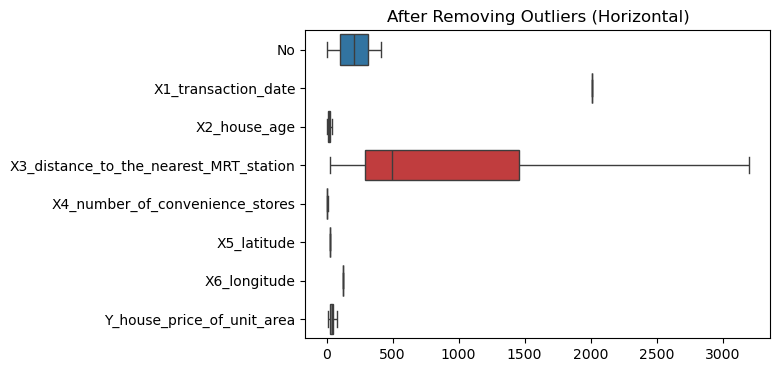

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, orient="h")
plt.title("After Removing Outliers (Horizontal)")
plt.show()

